# analysis of log files

In [1]:
%reload_ext autoreload
%autoreload 2

#from navsim_envs import arora as navenv
import numpy as np
import copy
import yaml
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

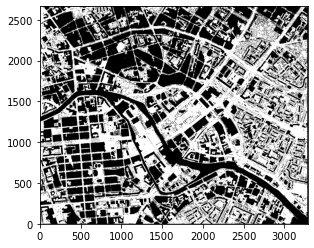

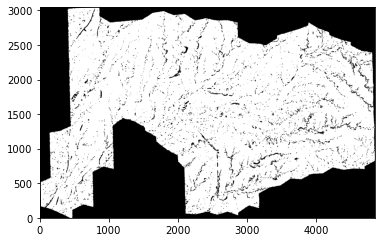

In [3]:
navmap_a = np.load(pathlib.Path.home() / 'exp' / 'arora.npy')
navmap_r = np.load(pathlib.Path.home() / 'exp' / 'ride.npy')
plt.imshow(navmap_a,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(navmap_r,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.show()

In [21]:
navmap = navmap_r
exp_ids = [f'ride_{i}' for i in range(1,9)]
exp_folders = [pathlib.Path.home() / 'exp' / exp_id for exp_id in exp_ids]
exp_folders

[PosixPath('/home/afandang/exp/ride_1'),
 PosixPath('/home/afandang/exp/ride_2'),
 PosixPath('/home/afandang/exp/ride_3'),
 PosixPath('/home/afandang/exp/ride_4'),
 PosixPath('/home/afandang/exp/ride_5'),
 PosixPath('/home/afandang/exp/ride_6'),
 PosixPath('/home/afandang/exp/ride_7'),
 PosixPath('/home/afandang/exp/ride_8')]

In [22]:
#print(yaml.dump(env_config))
vec_obs = [pd.read_csv(exp_folder / 'env_log' / 'vec_obs.csv') for exp_folder in exp_folders]
vec_obs = [item 
           for vec in vec_obs 
               for key,item in vec.groupby('e_num')]         

sp_obs_1 = [np.load(exp_folder / 'env_log' / 'sp_obs' / '1_0.npy') for exp_folder in exp_folders ]
sp_obs_2 = [np.load(exp_folder / 'env_log' / 'sp_obs' / '2_0.npy') for exp_folder in exp_folders ]
sp_obs = [val for pair in zip(sp_obs_1,sp_obs_2) for val in pair]
print(len(vec_obs),len(sp_obs))

16 16


In [23]:
vec_obs[0]

,e_num,s_num,spl_current,timestamp,posx,posy,posz,velx,vely,velz,rotx,roty,rotz,rotw,goalx,goaly,goalz,proxforward,prox45left,prox45right
0,1,0,50.009998,1.652287e+09,4078.0278,45.909767,758.68300,0.000000,-0.196200,0.000000,-0.000000,-0.000000,-0.000000,1.000000,4092.7837,48.522224,806.3923,NaN,NaN,NaN
1,1,1,50.009998,1.652287e+09,4078.0278,45.900253,758.68300,0.000000,-0.475600,0.000000,-0.000000,-0.000000,-0.000000,1.000000,4092.7837,48.522224,806.3923,NaN,NaN,NaN
2,1,2,50.009998,1.652287e+09,4078.0278,45.885090,758.68300,0.000000,-0.758136,0.000000,-0.000000,-0.000000,-0.000000,1.000000,4092.7837,48.522224,806.3923,NaN,NaN,NaN
3,1,3,50.009998,1.652287e+09,4078.0278,45.864216,758.68300,0.000000,-1.043745,0.000000,-0.000000,-0.000000,-0.000000,1.000000,4092.7837,48.522224,806.3923,NaN,NaN,NaN
4,1,4,50.009998,1.652287e+09,4078.0278,45.839523,758.68330,-0.002503,-1.234655,0.016324,0.000276,-0.000059,0.000626,1.000000,4092.7837,48.522224,806.3923,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,563,4.500000,1.652287e+09,4088.4536,47.824910,807.00494,5.286578,-0.417118,-5.258085,0.004743,0.894274,-0.051809,0.444486,4092.7837,48.522224,806.3923,NaN,NaN,NaN
564,1,564,4.380000,1.652287e+09,4088.5590,47.816300,806.89740,5.286365,-0.430540,-5.378008,0.005231,0.899183,-0.051464,0.434505,4092.7837,48.522224,806.3923,NaN,NaN,NaN
565,1,565,4.260000,1.652287e+09,4088.6650,47.807120,806.78770,5.283520,-0.458902,-5.483009,0.005678,0.903909,-0.050875,0.424652,4092.7837,48.522224,806.3923,NaN,NaN,NaN
566,1,566,4.140000,1.652287e+09,4088.7705,47.797554,806.67615,5.276703,-0.478308,-5.579856,0.006132,0.908434,-0.050088,0.414971,4092.7837,48.522224,806.3923,NaN,NaN,NaN


In [24]:
# the paths taken
for vec in vec_obs:
    print(vec[['posx','posz']])

          posx       posz
0    4078.0278  758.68300
1    4078.0278  758.68300
2    4078.0278  758.68300
3    4078.0278  758.68300
4    4078.0278  758.68330
..         ...        ...
563  4088.4536  807.00494
564  4088.5590  806.89740
565  4088.6650  806.78770
566  4088.7705  806.67615
567  4088.7495  806.62933

[568 rows x 2 columns]
           posx       posz
568   442.61120  1527.2566
569   442.61084  1527.2618
570   442.61060  1527.2697
571   442.61023  1527.2794
572   442.60986  1527.2908
...         ...        ...
1017  465.27405  1570.6598
1018  465.20056  1570.7959
1019  465.12354  1570.9294
1020  465.04260  1571.0600
1021  465.10828  1571.1052

[454 rows x 2 columns]
          posx       posz
0    4078.0278  758.68300
1    4078.0278  758.68300
2    4078.0278  758.68300
3    4078.0278  758.68300
4    4078.0278  758.68330
..         ...        ...
498  4088.4380  806.31360
499  4088.5156  806.38310
500  4088.5947  806.44810
501  4088.6748  806.50850
502  4088.6660  806.58014

[50

In [25]:
#maximum episodes ran for each
for vec in vec_obs:
    #vec = vec.groupby('e_num')
    print(vec['s_num'].max())
    #print(vec[['posx','posy']])

567
453
502
550
559
53
519
4000
1
923
1
780
1
796
1
942


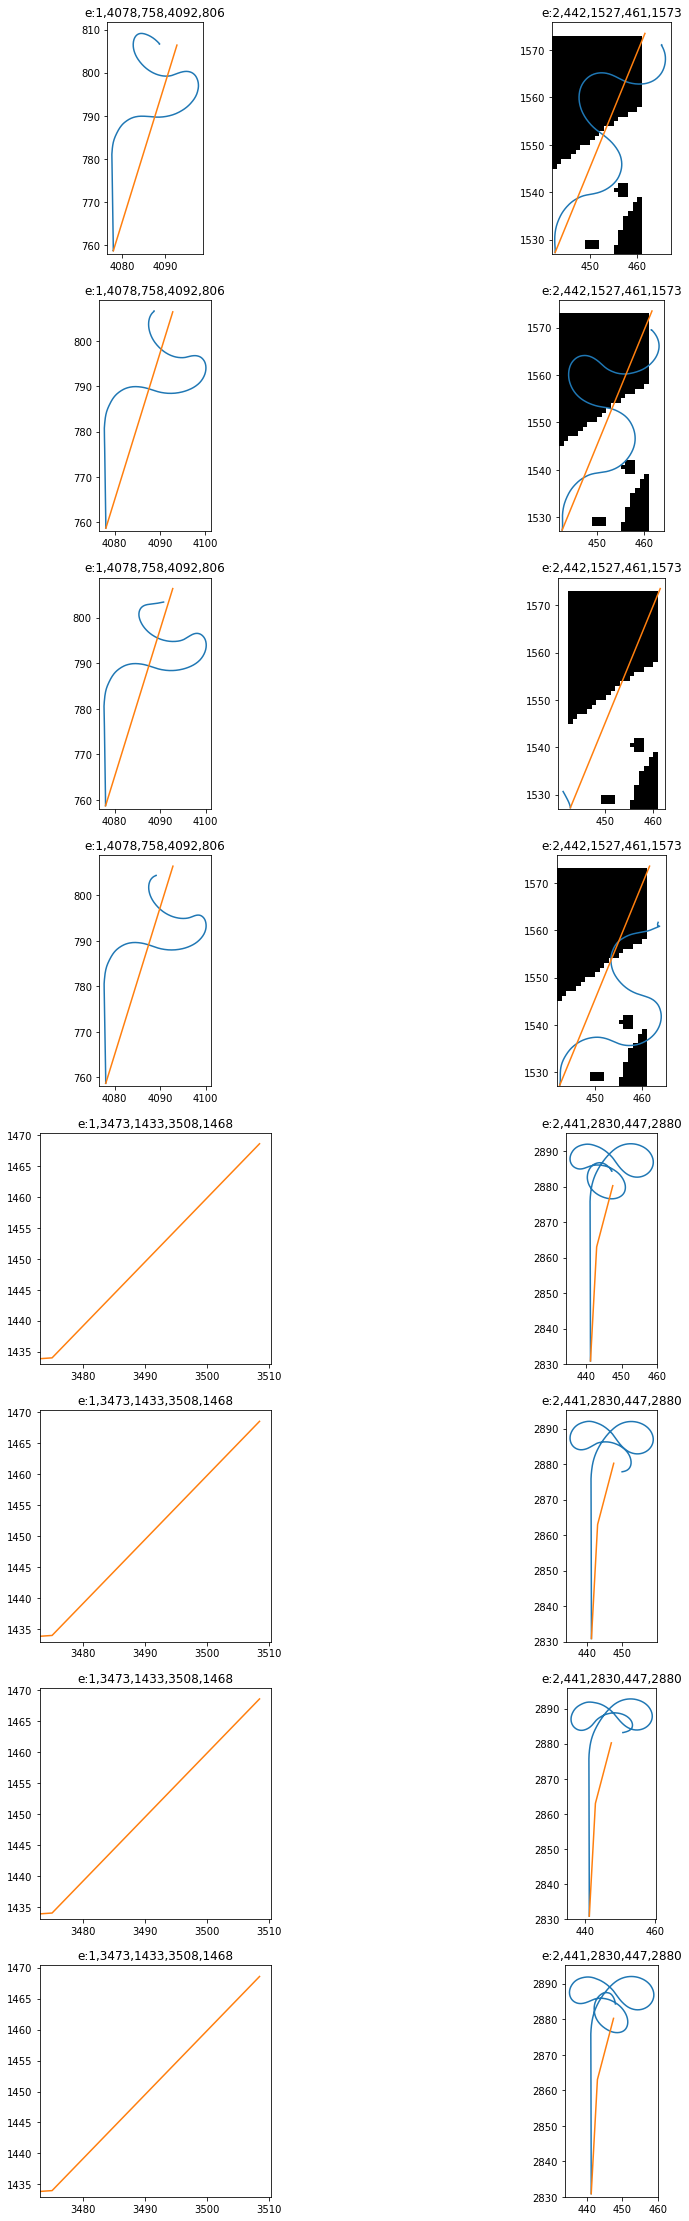

In [26]:
#plot of paths taken for each

subplot_rows = int(len(vec_obs)/2)
f, axs = plt.subplots(subplot_rows,2,figsize=(15,40))
for i,(vec,sp) in enumerate(zip(vec_obs,sp_obs)):
    #vec = vec.groupby('e_num')
    #for key, item in vec:
    plt.subplot(subplot_rows, 2, i+1)
    y1=int(sp[0, 2])
    y2=int(sp[-1, 2])
    x1=int(sp[0, 0])
    x2=int(sp[-1, 0])
    plt.imshow(navmap_a[y1:y2,x1:x2],origin='lower',cmap='gray', vmin=0, vmax=1,extent=(x1,x2,y1,y2))
    
    #plt.imshow(navmap_a,origin='lower',cmap='gray', vmin=0, vmax=1)
    #item[['posx','posy']].plot(x='posx',y='posy',kind='scatter', title = f'e:{key}')
    #plt.scatter(x=vec[['posx']].to_numpy(),y=vec[['posy']].to_numpy(),c='r')
    pos=vec[['posx','posy','posz']].to_numpy()
    plt.plot(pos[:, 0], pos[:, 2])
    plt.plot(sp[:, 0], sp[:, 2])
    plt.title(f'e:{2 if (i+1)%2==0 else 1},{x1},{y1},{x2},{y2}')
    # starting points: {sp[0,0],sp[0,2]},{pos[0,0],pos[0,2]}
plt.show()